In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:95% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font color="red" size="5">ch.12 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib(데이터 시각화), seaborn(데이터 시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리, 판다스 내부에 포함되어있음.
    * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리

# 1절 matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/index

In [3]:
import matplotlib
matplotlib.__version__

'3.7.0'

## 1.1 패키지 import 및 기본 설정

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 해상도를 높여줌
%config InlineBackend.figure_format = 'retina'

# 한글설정

# warning(경고창)을 안보이게 하는 법


## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장

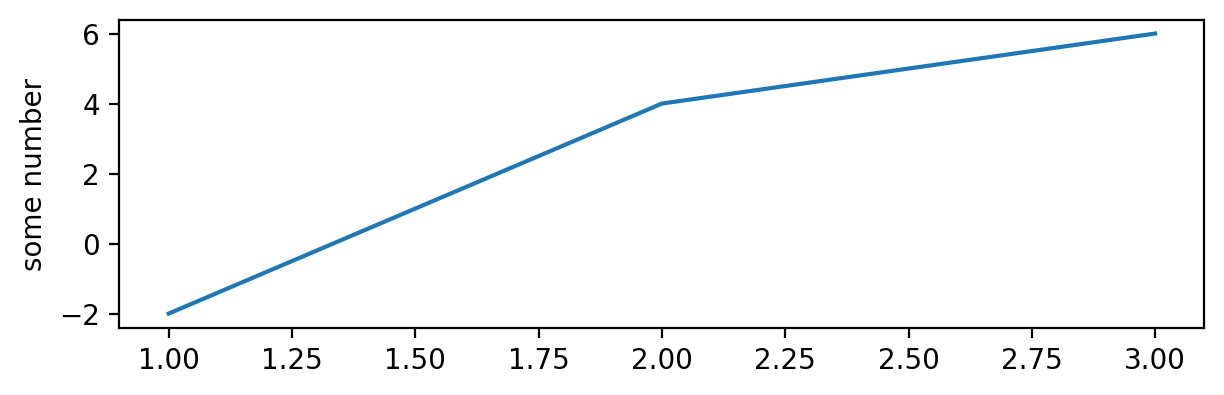

In [12]:
# 1)데이터 준비
x = [1,2,3] 
y = [-2, 4, 6]
# 2) 그래프 생성
plt.figure(figsize=(7, 2))
# 3) 그래프 함수로 그리기 
plt.plot(x, y) 
# 4) 그래프 커스터마이징
plt.ylabel('some number')
# 5) 그래프 출력 cf) plt.savefig('파일명.jpg')
plt.show()

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [15]:
import numpy as np
x = np.arange(0, 10, 0.01)
len(x)

1000

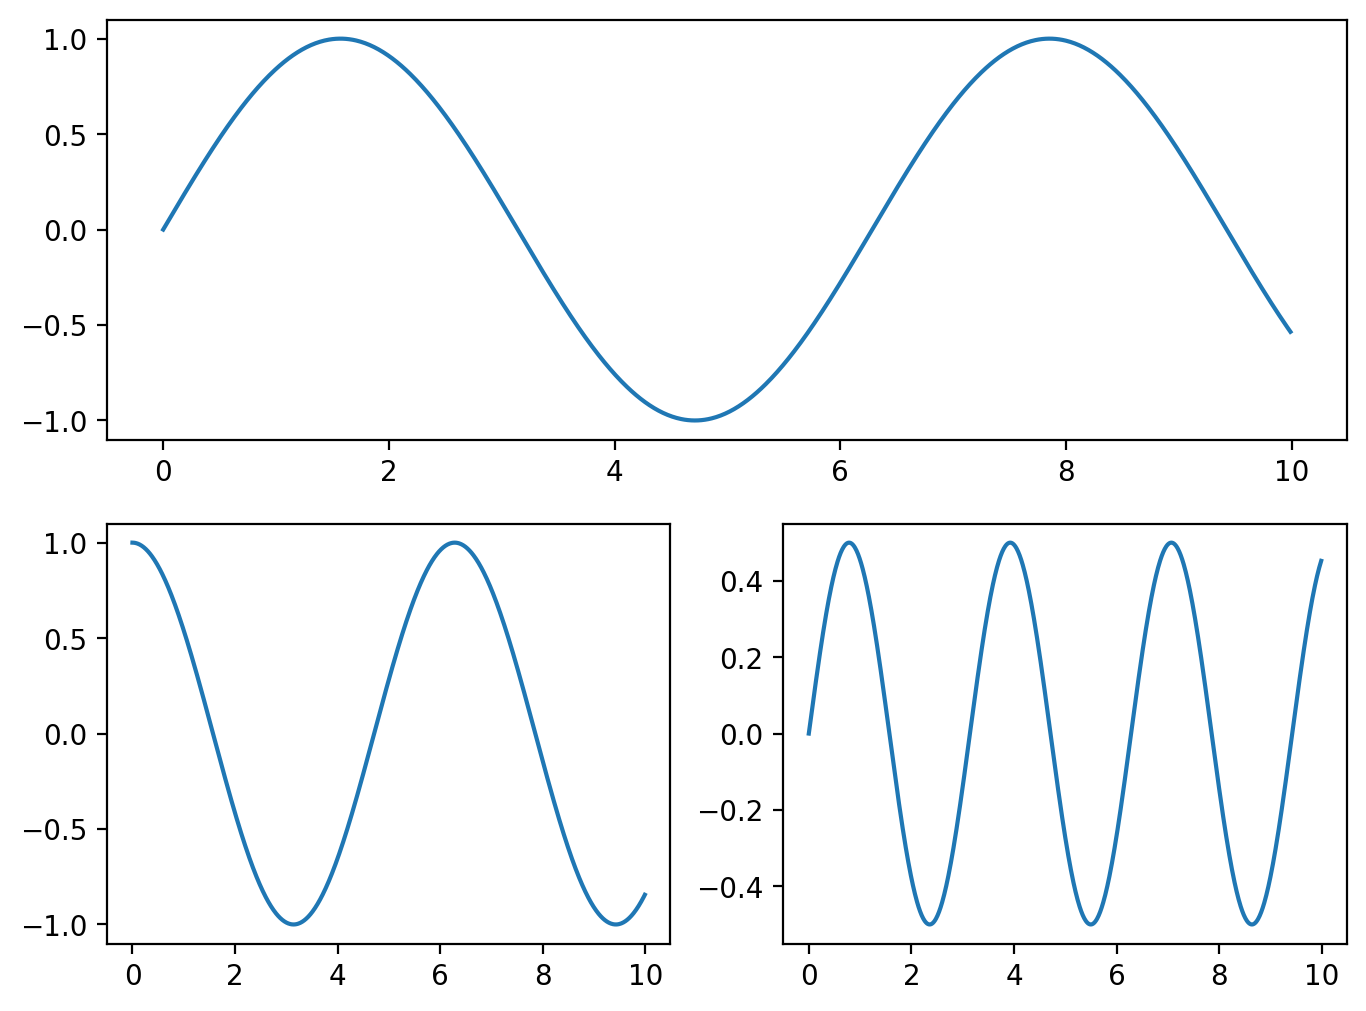

In [20]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(224);     plt.plot(x, np.sin(x)*np.cos(x))

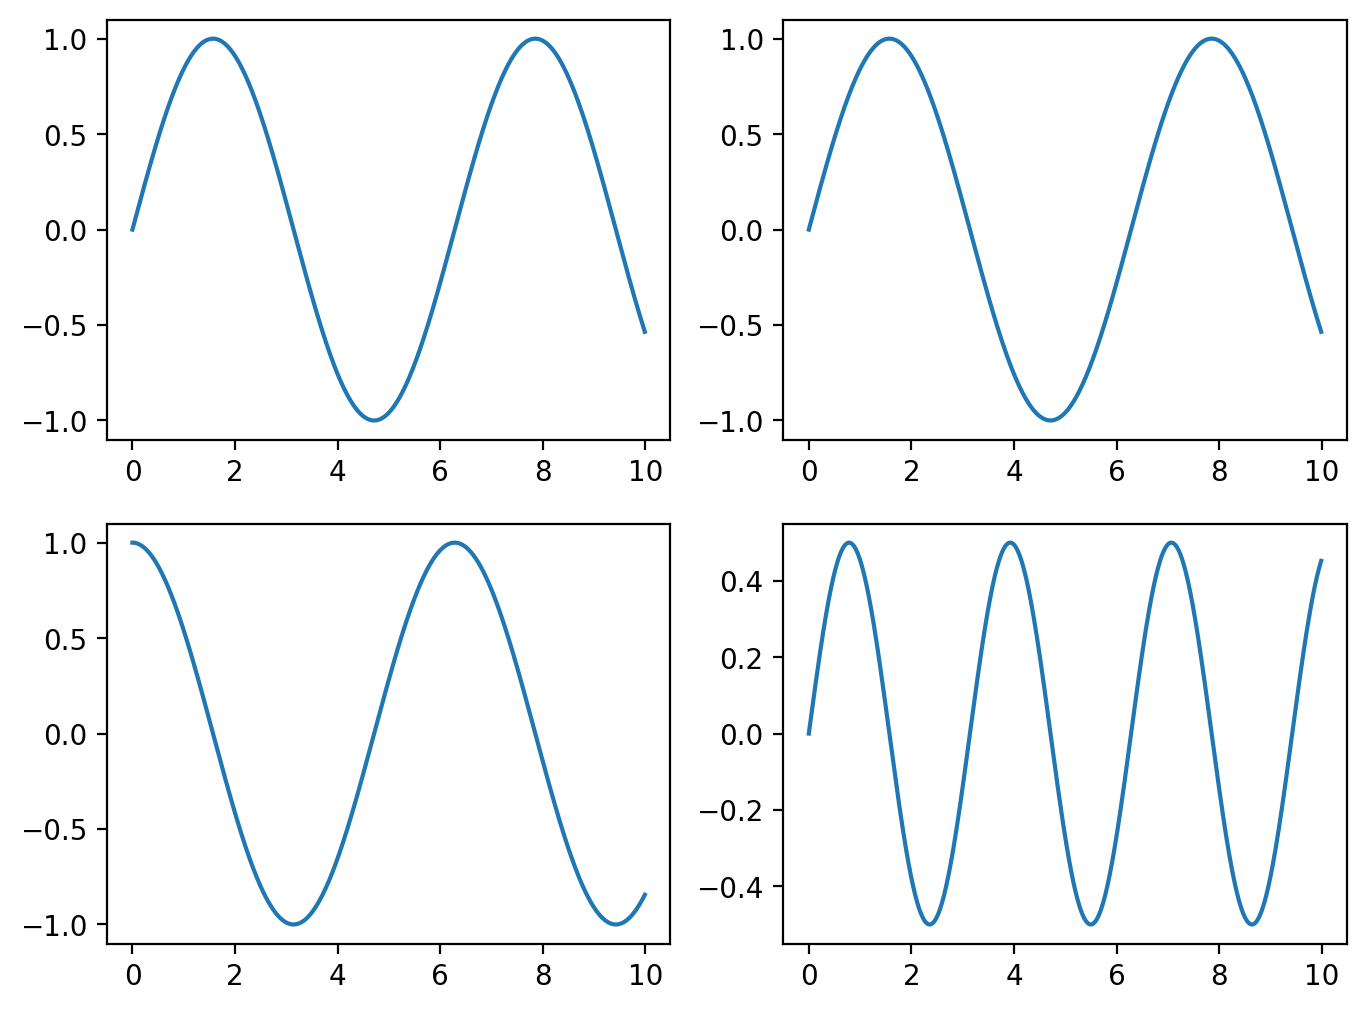

In [22]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplots()함수로 서브플롯 추가
- 교안 (14page) : https://wikidocs.net.92085

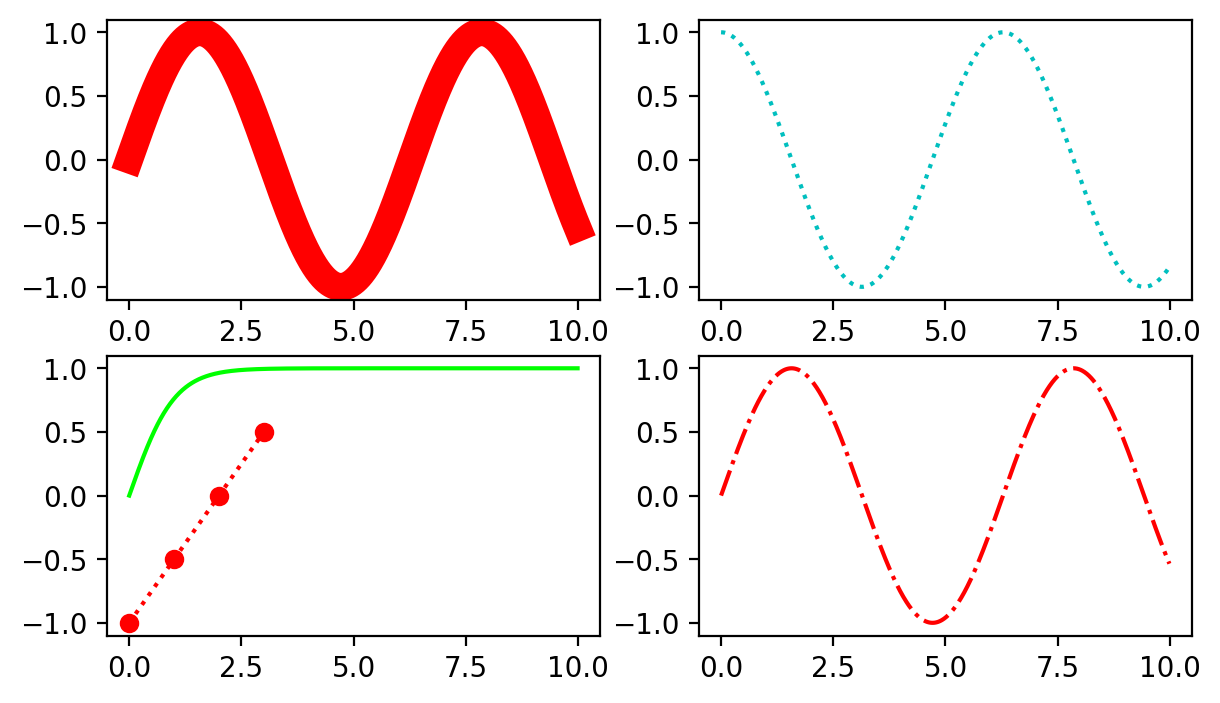

In [34]:
# 2행 2열 짜리 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 4))
axes[0,0].plot(x, np.sin(x), color='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c:') #color='c', linestyle=':','--','-'
axes[1,0].plot([0,1,2,3],[-1,-0.5, 0, 0.5], 'ro:') # color='r', marker='s''o''^'
axes[1,0].plot(x, np.tanh(x), '#00FF00')
axes[1,1].plot(x, np.sin(x), 'r-.')
plt.show()

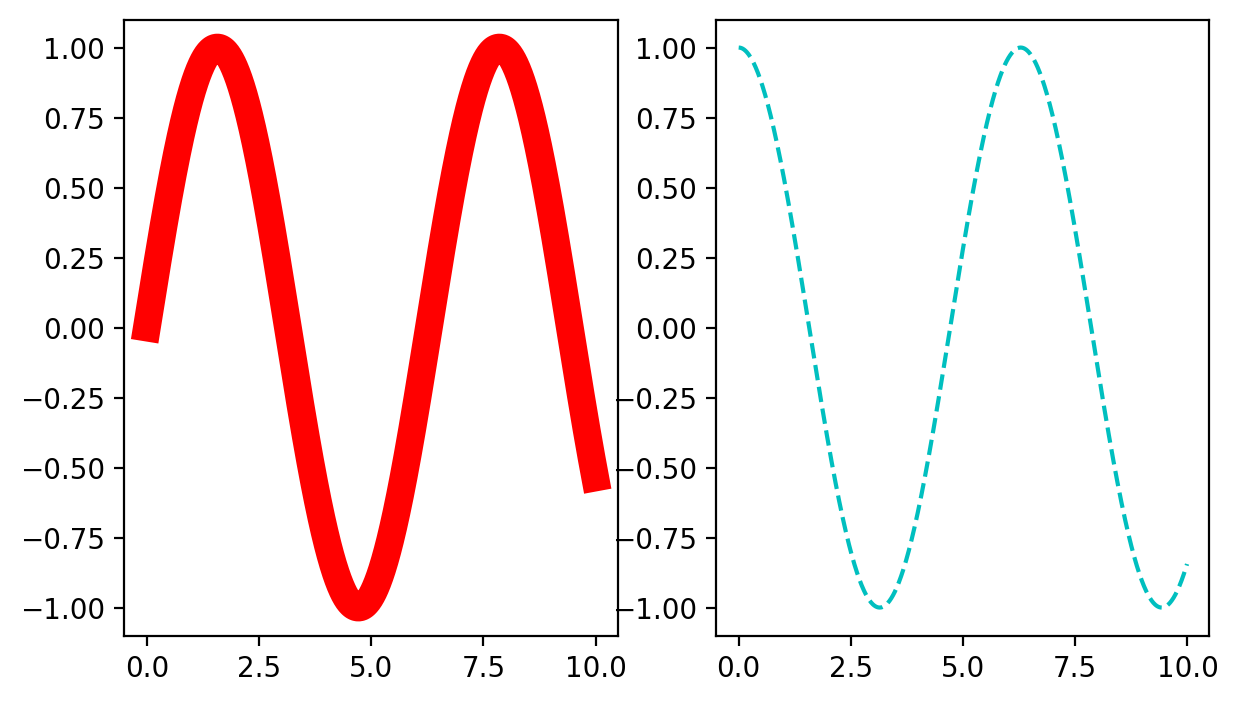

In [36]:
# 2행 2열 짜리 서브플롯
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))
axes[0].plot(x, np.sin(x), 'r', linewidth=10)
axes[1].plot(x, np.cos(x), 'c--') #color='c', linestyle=':','--','-'

### 3) pandas.DaraFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, kind='line' figsize, title, xlim, ylim...)
    * kind : line(기본값), scatter(점도표), bar, barh, box, pie, density,...
    * xlim, ylim : list/tuple

In [37]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica


범례사용 https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

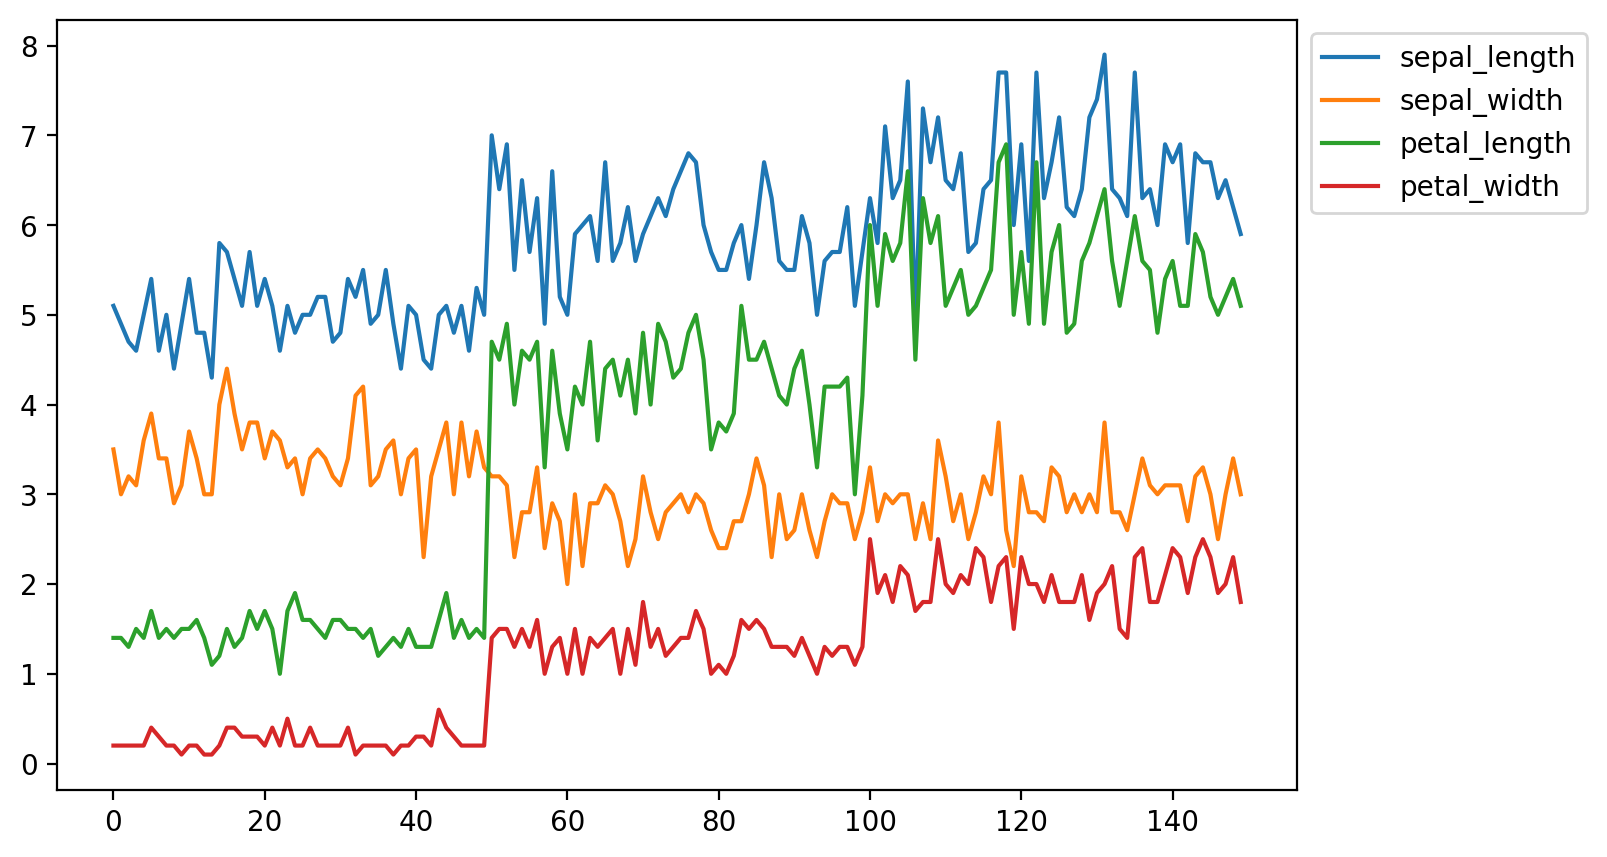

In [46]:
g = iris.plot(kind='line', figsize=(8,5))
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.savefig('data/ch12_iris.jpg')

In [47]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


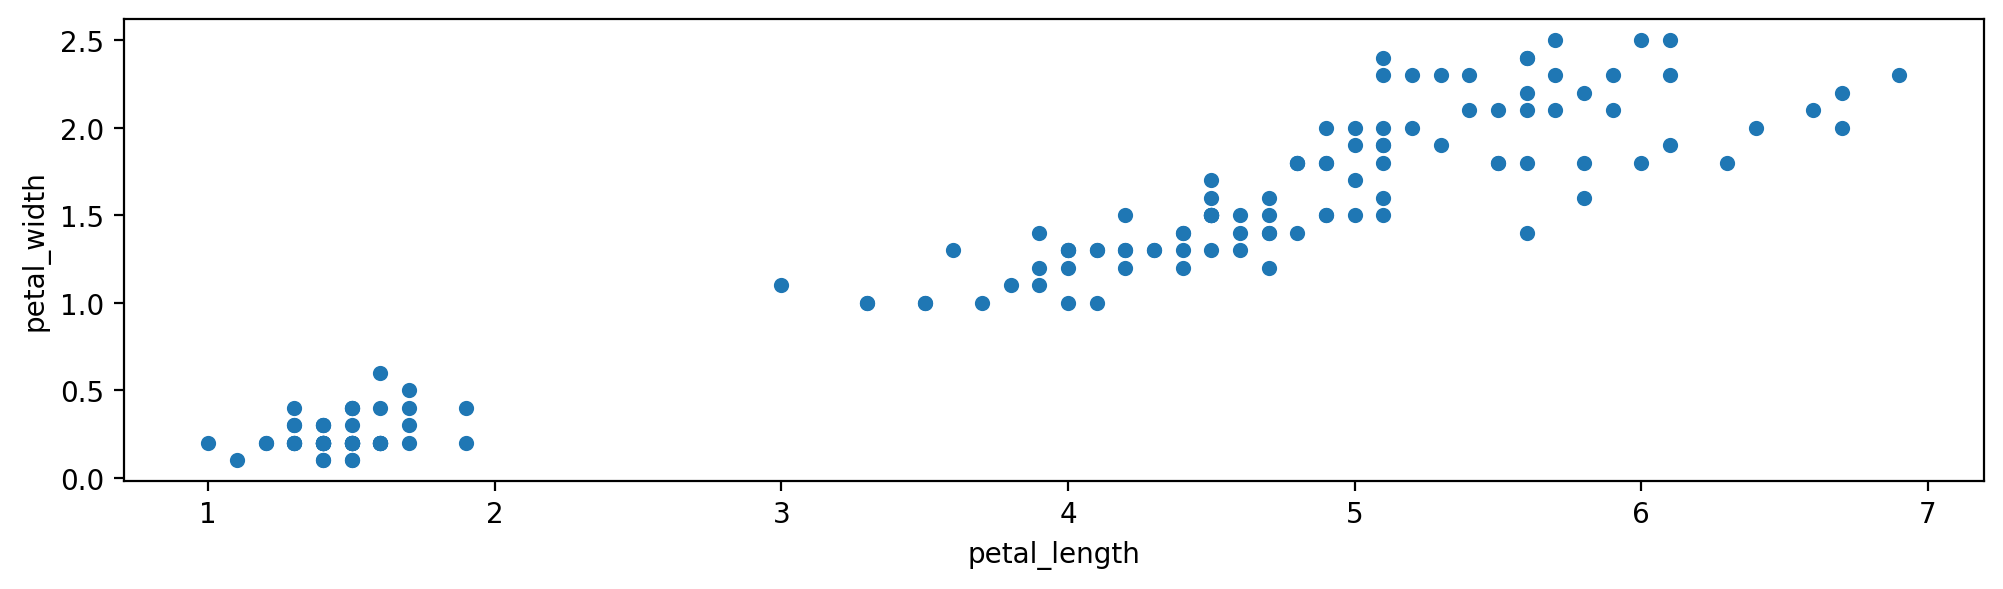

In [48]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

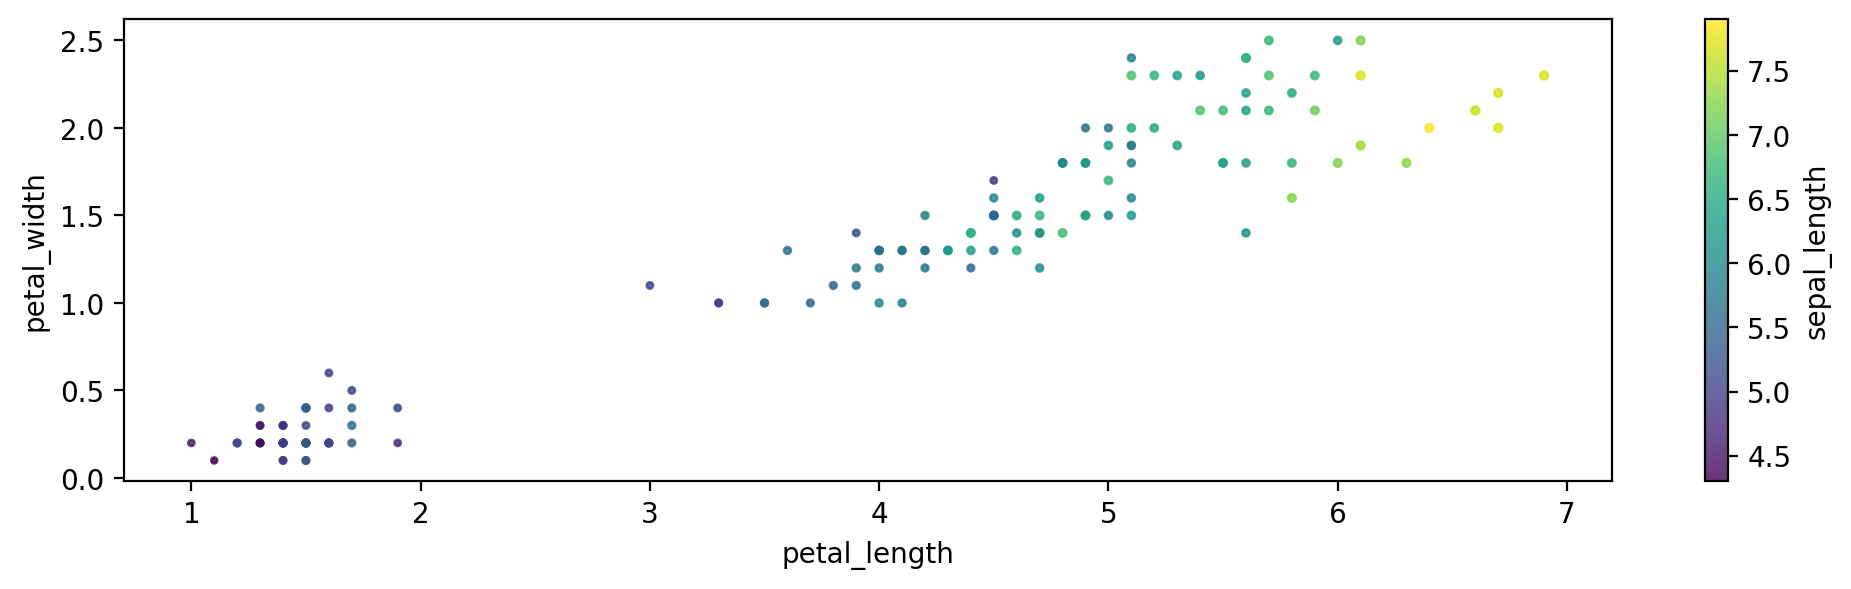

In [52]:
iris.plot(kind='scatter',
         x='petal_length',
         y='petal_width',
         figsize=(12,3),
         s='sepal_length', #size
         c='sepal_length', #color
         alpha=.8) #0<=투명도<=1
plt.show()

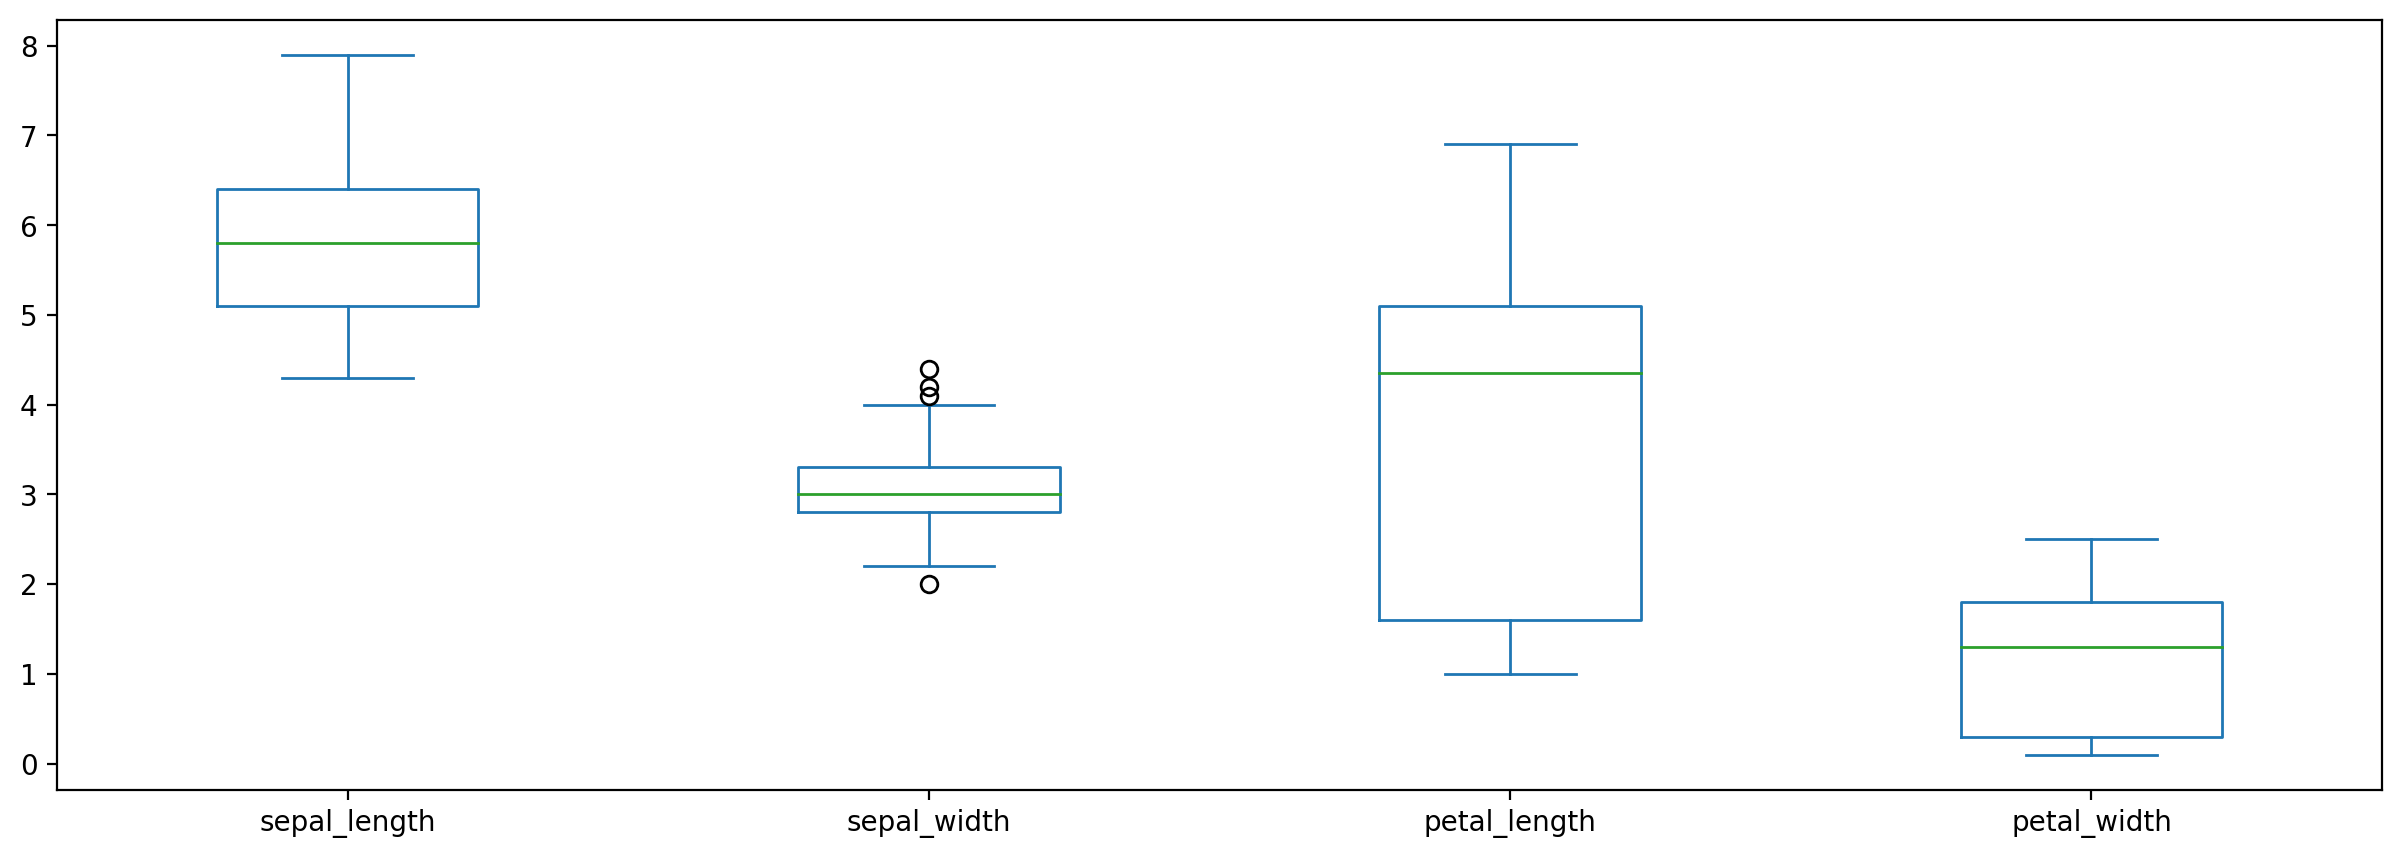

In [55]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, nin, max)
iris.plot(kind='box', figsize=(15,5))
plt.show()

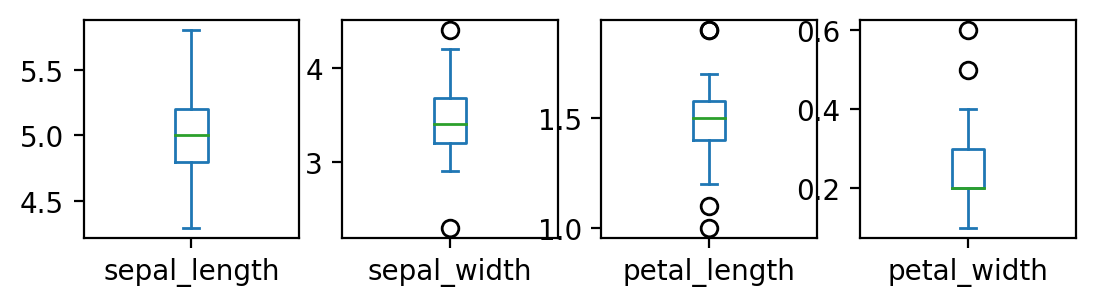

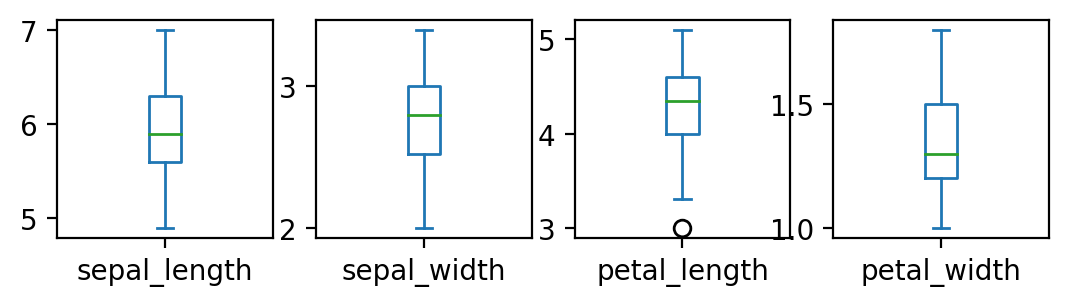

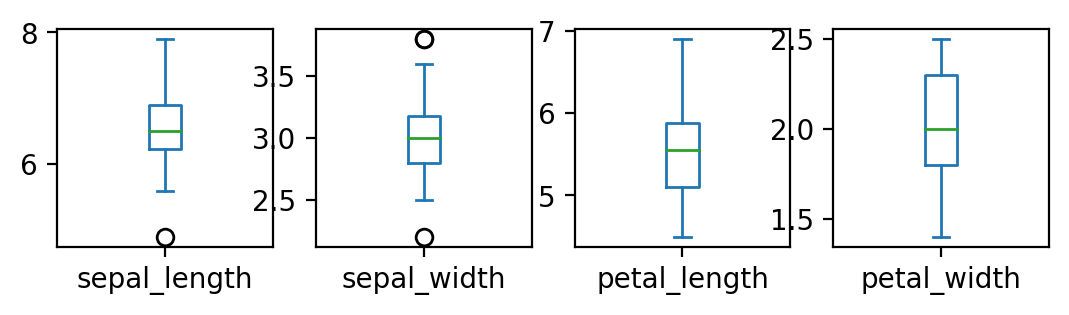

In [61]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3,4),
                            sharex=True) #x축공유
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot함수들 : https://matplotlib.org/stable/tutorials/colors/colormaps.html

    ### 1) plt.scatter(): 산점도

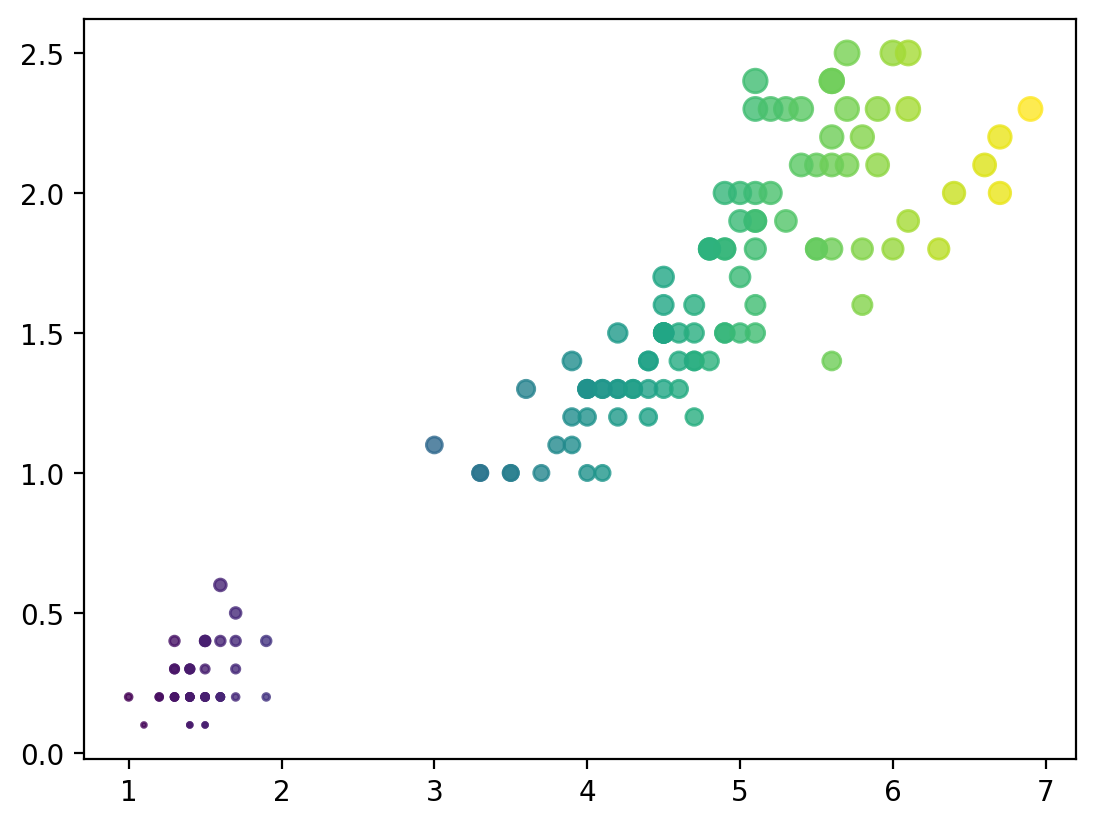

In [66]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.petal_width*30,  # size
           c=iris.petal_length*20, 
           alpha=.8)

### 2) boxplot(단점:분포를 몰라), violinplot()

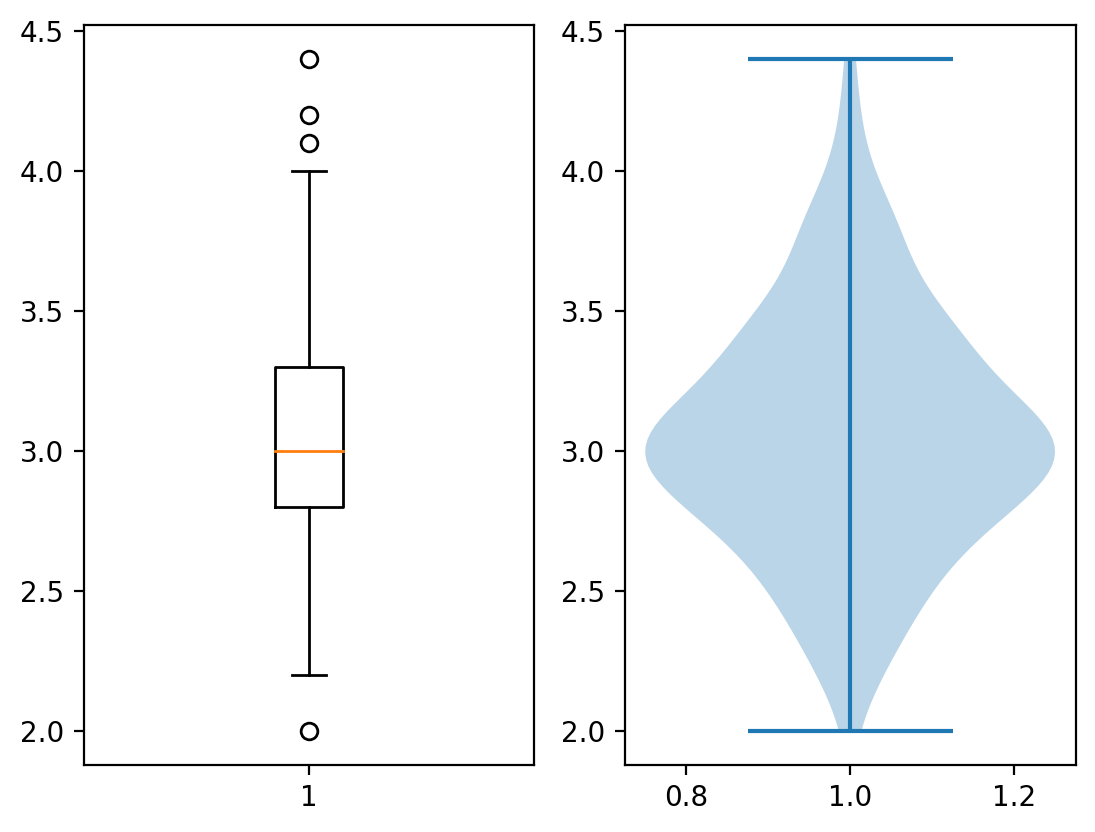

In [69]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

### 3)bar(), barh(), axvline(수직선), axhline(수평선)

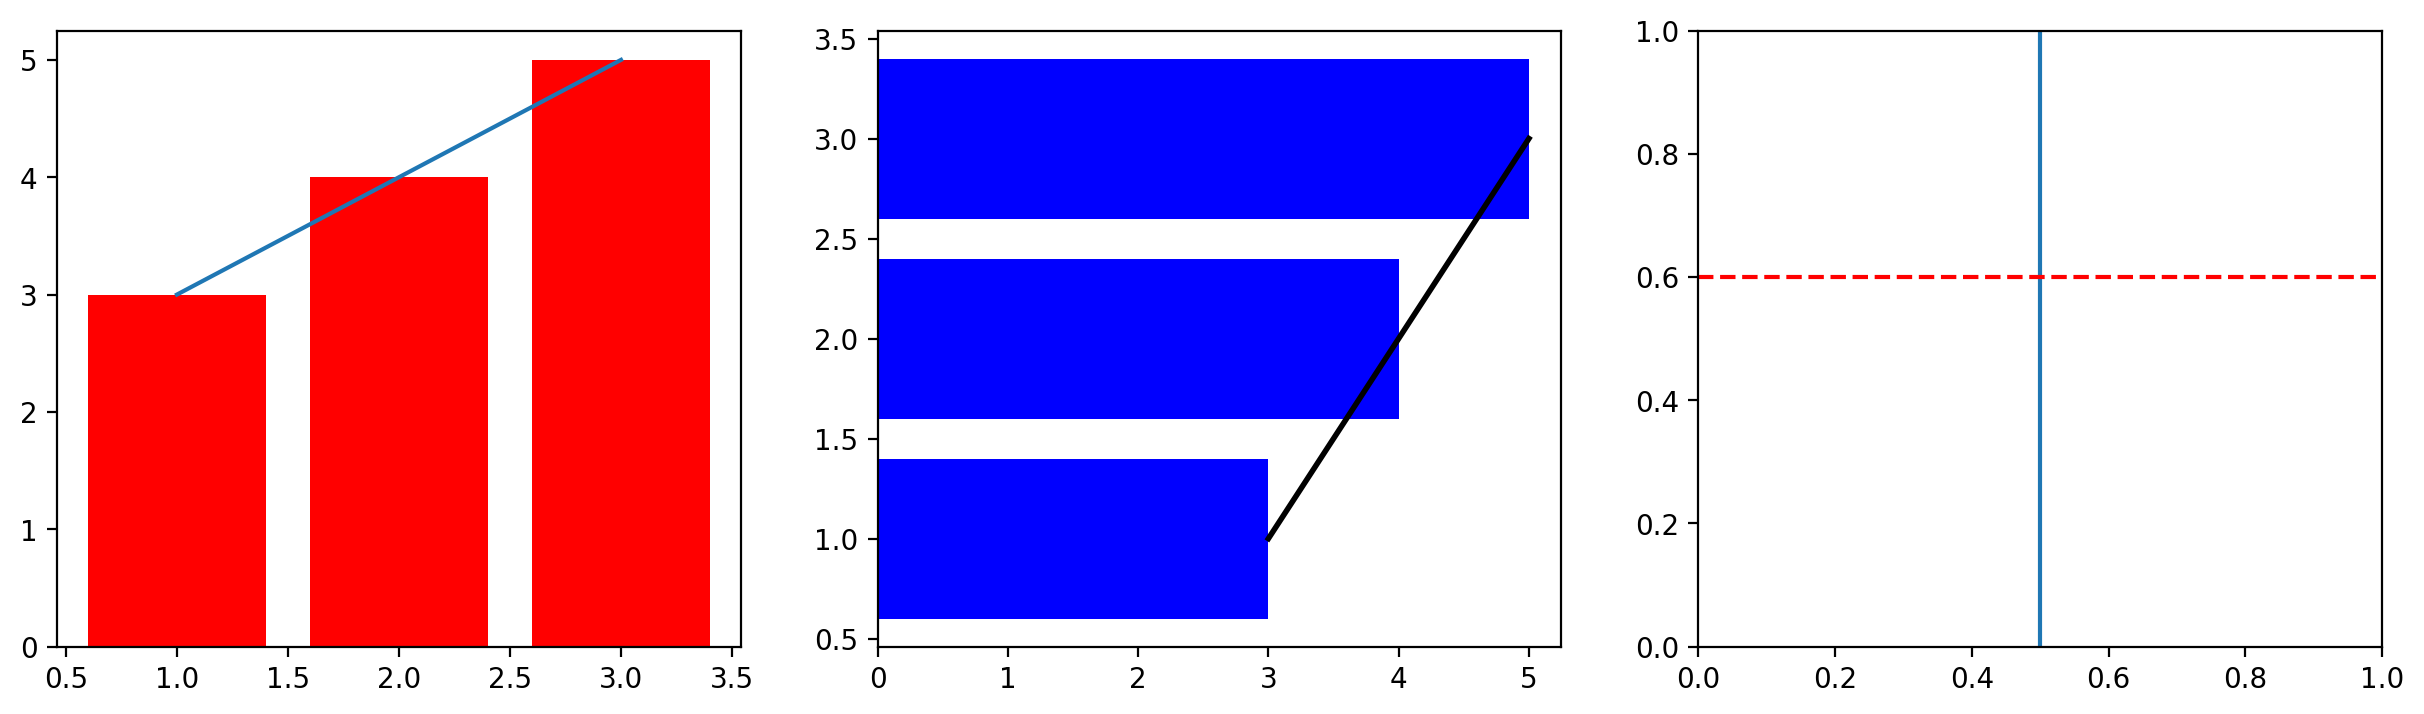

In [80]:
x=[1, 2, 3]
y=[3, 4, 5]
fig, axes = plt.subplots(ncols=3, figsize=(15,4))
# bar
axes[0].bar(x, y, color='r')
axes[0].plot(x,y)
#barh
axes[1].barh(x, y, color='b')
axes[1].plot(y,x, 'k', linewidth=2) # k:black
#axvline(수직선)
axes[2].axvline(0.5)
#axhline(수평선)
axes[2].axhline(0.6, c='r', linestyle='--')

### 4) hist(도수분포표;histogram)

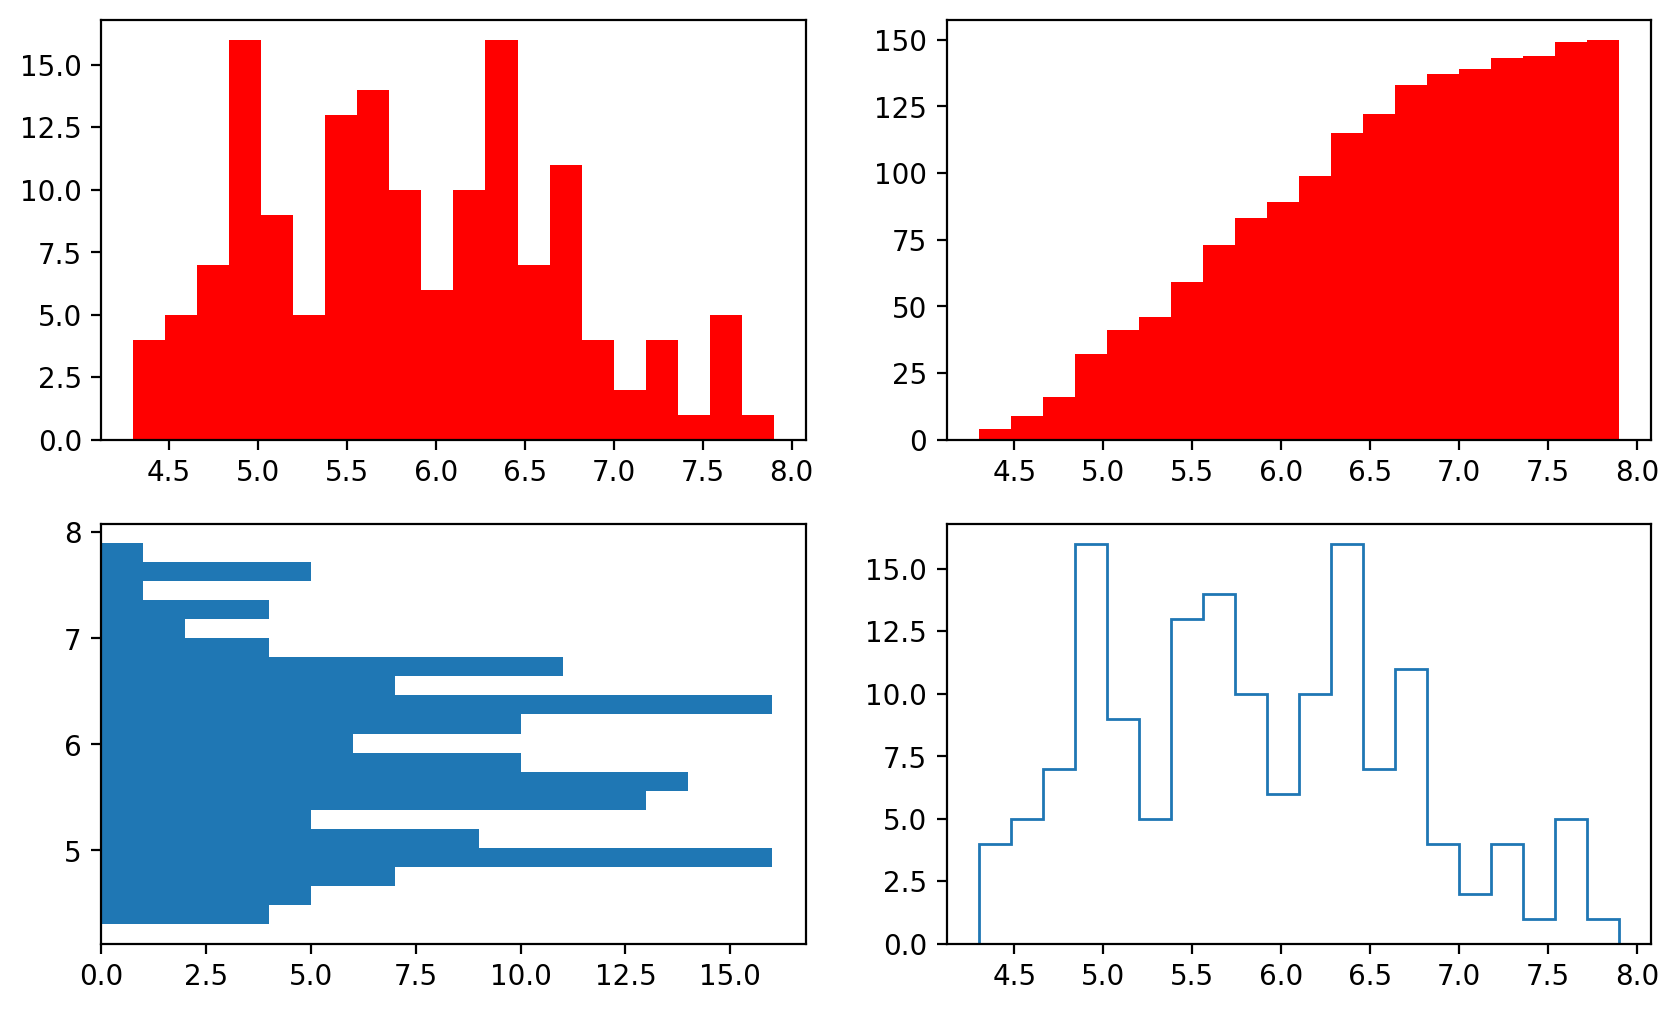

In [89]:
# 히스토그램(도수분포표)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r')

# 누적히스토그램(도수분표표)
axes[0,1].hist(iris.sepal_length, bins=20, color='r', cumulative=True)
# 수평히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal')
# 뭔지모를 모시깽이
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
plt.show()

## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker... (plot의 매개변수로 지정)
### 2) text(), annotate()

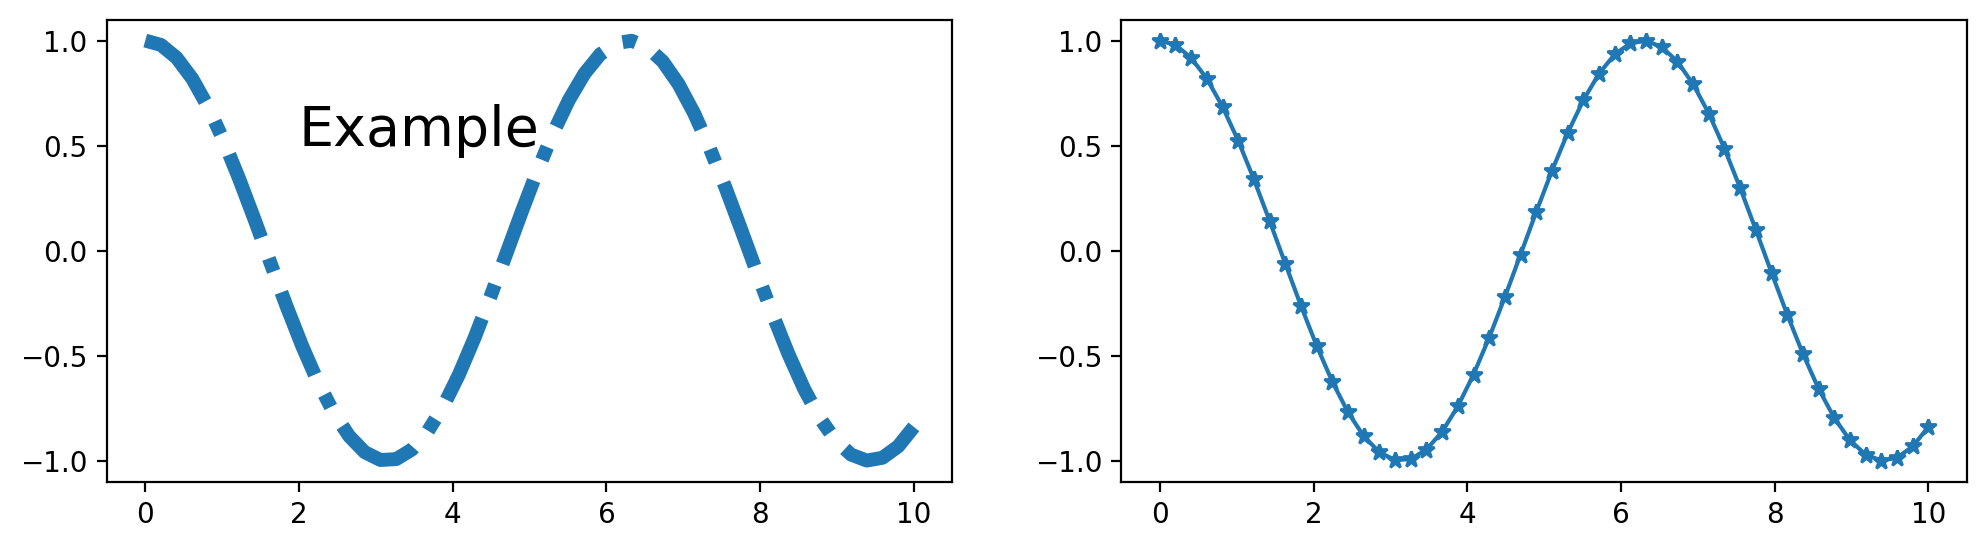

In [100]:
x = np.linspace(0,10) #num=50
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(x, y, linewidth=5, linestyle='-.')
axes[0].text(2, 0.5, 'Example', fontsize=20)
axes[1].plot(x, y, marker='*')
plt.show()